---
title: "Taller - Sesion 3 - Series de Tiempo y Python IIE - UNAM"
author:
  - name: Luis E. Ascencio G. 
    orcid: 0009-0009-1694-5993
    email: luis.ascencio@cimat.mx
    affiliation: 
      - name: CIMAT
        city: Guanajuato
        state: Guanajuato
        url: https://www.cimat.mx
abstract: > 
  Este Notebook incluye una introduccion al manejo de Series de Tiempo con Python 
keywords:
  - Series de Tiempo
  - ARIMA
  - Python
  - R
  - Estadistica
license: "CC BY"
copyright: 
  holder: Luis E. Ascencio G.
  year: 2025
citation: 
  container-title: CIMAT
  volume: 1
  issue: 1
  doi: 000000/00000000
funding: "This work was supported by the Mexican Secretariat of Science, Humanities, Technology, and Innovation (SECIHTI, México) project CBF2023-2024-3976. Luis Enrique Ascencio Gorozpe is a doctoral student from the PhD in Probability and Statistics program, at Mathematics research center (CIMAT), he received  fellowship with number (CVU) 695305 from SECIHTI."
format:
  pdf:
    documentclass: scrartcl
    toc: true
    number-sections: true
    colorlinks: true
---

In [2]:
import numpy as np # Libreria Matematica basica
import pandas as pd # Libreria para manejo, manipulacion y visualizacion de datos 
from pandas import read_excel # funcion para leer archivos de excel


import matplotlib as mpl # Libreria para visualizacion de datos y graficas
import matplotlib.pyplot as plt   # Funcion para graficar 
import seaborn as sns             # Libreria para visualizacion de datos
from pandas.plotting import autocorrelation_plot

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess

import session_info

In [70]:
df = pd.read_csv('AirPassengers.csv')
df1 = read_excel('ClayBricks.xls')
df2 = read_excel('Electricity.xls')
df3 = read_excel('MilkProduction.xls')
df4 = read_excel('JapaneseCars.xls')
df5 = read_excel('HouseSales.xls')

In [72]:
df??

Type:        DataFrame
String form:
       Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]
Length:      144
File:        ~/anaconda3/lib/python3.13/site-packages/pandas/core/frame.py
Source:     
class DataFrame(NDFrame, OpsMixin):
    """
    Two-dimensional, size-mutable, potentially heterogeneous tabular data.

    Data structure also contains labeled axes (rows and columns).
    Arithmetic operations align on both row and column labels. Can be
    thought of as a dict-like container for Series objects. The primary
    pandas data structure.

    Parameters
    ----------
    data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
        Dict can contain Series, arrays, constants, dataclas

# Simulacion de Series de Tiempo

Definimos la funcion para graficar series de Tiempo

In [4]:
def plot_df(df, x, y, title="", xlabel='Fecha', ylabel='Numero de Pasajeros', colores="", dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color=colores)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

Programa para simular modelos MA(q)

In [5]:
def Simul_TS_MA(Q,T):
    print("TS MA de Orden:",len(Q))
    t0=np.random.rand(len(Q))
    E=list(t0)
    X=[]
    x=0
    for i in range(T):
        e=np.random.normal(0,1)
        x=e
        for j in range(len(Q)):
            x=x+Q[j]*E[-j-1]
        X.append(x)
        E.append(e)
        x=0
        e=0
    return(X)

Programa para simular modelos AR(p)

In [6]:
def Simul_TS_AR(P,T):
    print("TS AR de Orden:",len(P))
    t0=np.random.rand(len(P))
    E=np.random.rand(len(P))
    X=list(t0)
    x=0
    for i in range(T):
        x=np.random.normal(0,1)
        for j in range(len(P)):
            x=x+P[j]*X[-j-1]
        X.append(x)
        x=0
    return(X)

Programa para simular modelos ARMA(p,q)

In [7]:
def Simul_TS_ARMA(P,Q,T):
    print("TS ARMA de Orden: p="+str(len(P))+', q='+str(len(Q)))
    t0=np.random.rand(len(P))
    E=np.random.rand(len(P))
    X=list(t0)
    x=0
    for i in range(T):
        e=np.random.normal(0,1)
        x=e
        for j in range(len(P)):
            x=x+P[j]*X[-j-1]
            x=x+Q[j]*E[-j-1]
        X.append(x)
        x=0
    return(X)

Simulamos un modelo AR

TS AR de Orden: 2


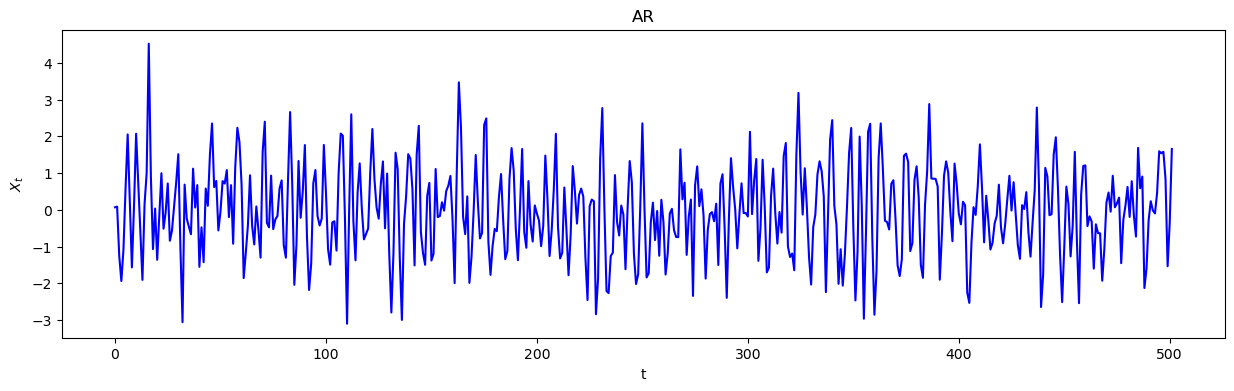

In [65]:
C=[1/2,-1/2]
T=500
AR3_1=Simul_TS_AR(C,T)
plot_df(AR3_1, range(T+len(C)), AR3_1, title="AR", xlabel='t', ylabel='$X_t$', colores="blue", dpi=100)

Simulamos un modelo MA(q)

TS MA de Orden: 6


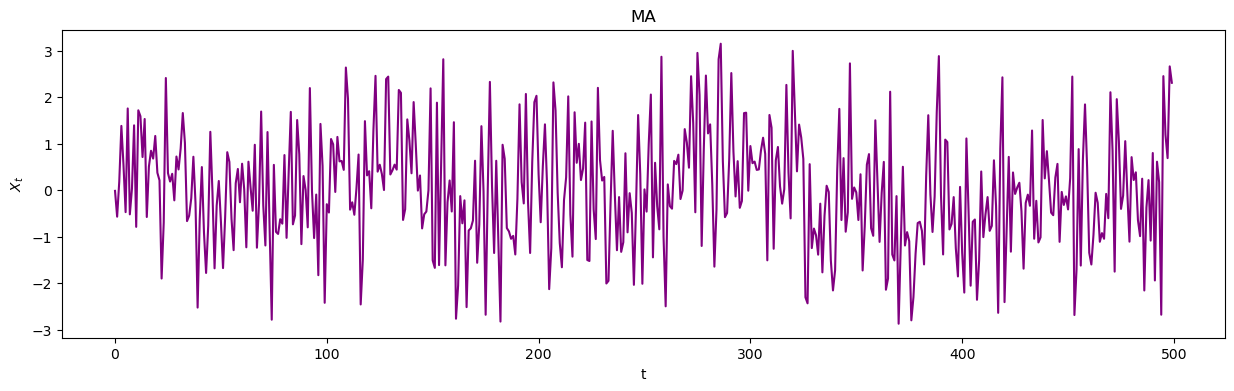

In [19]:
C=[1/2,-1/2,0.3,0.2,0.2,0.3]
MA3_1=Simul_TS_MA(C,T)
plot_df(MA3_1, range(T), MA3_1, title="MA", xlabel='t', ylabel='$X_t$', colores="purple", dpi=100)

Simulamos un modelo ARMA(p,q)

TS ARMA de Orden: p=6, q=6


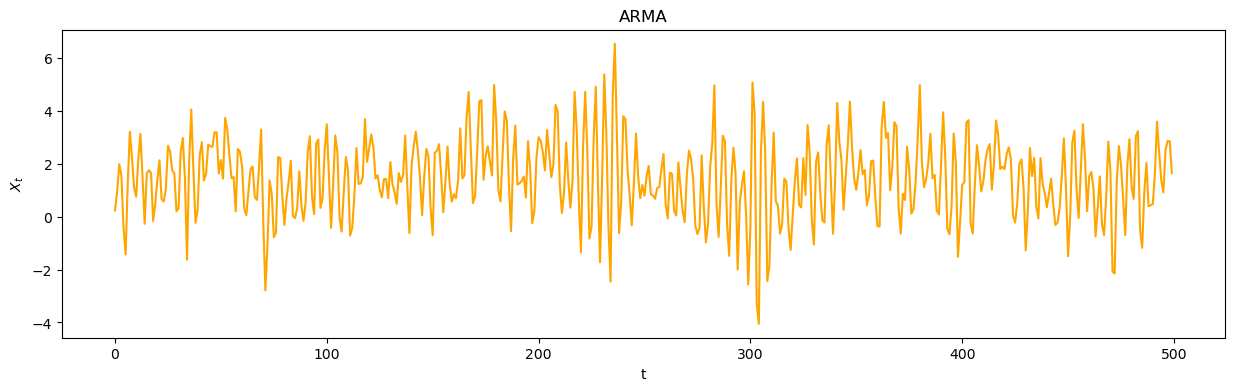

In [24]:
P=[1/2,-1/2,0.15,0.2,0.2,0.12]
Q=[1/2,-1/2,0.1,0.2,0.2,0.2]
ARMA3_1=Simul_TS_ARMA(P,Q,T)
plot_df(ARMA3_1[len(P):], range(T), ARMA3_1[len(P):], title="ARMA", xlabel='t', ylabel='$X_t$', colores="orange", dpi=100)

# Descripcion de modelos mediante ACF y PACF

ACF y PACF del modelo AR

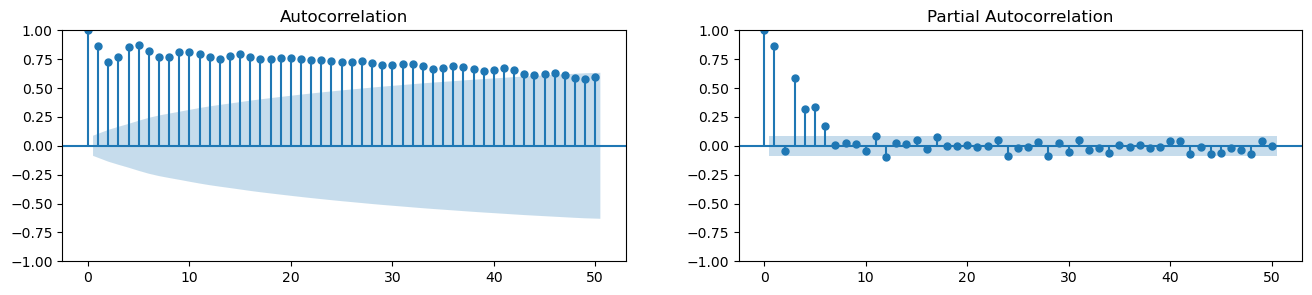

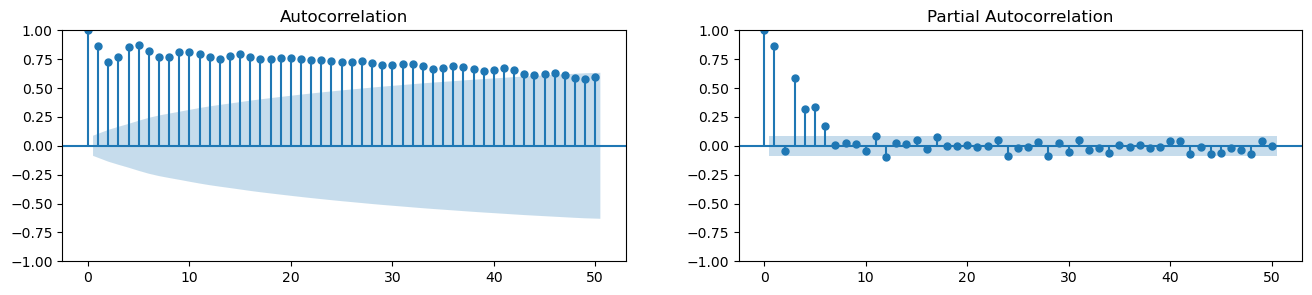

In [15]:
# Graficas
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(AR3_1, lags=50, ax=axes[0])
plot_pacf(AR3_1, lags=50, ax=axes[1])

ACF y PACF del modelo MA

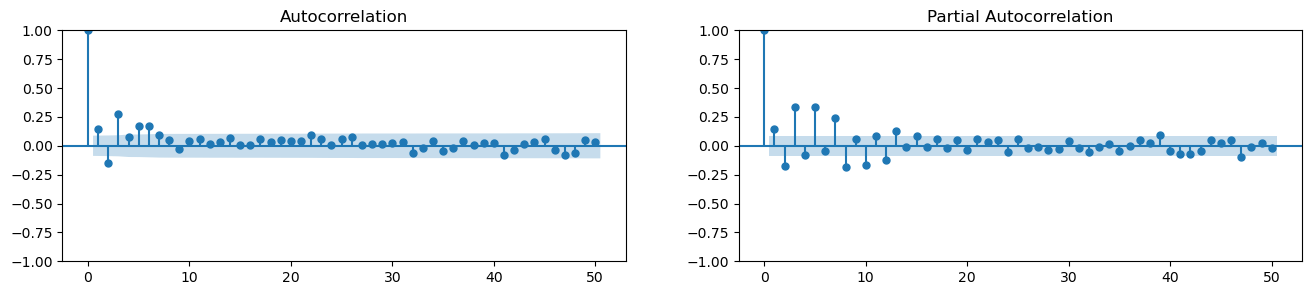

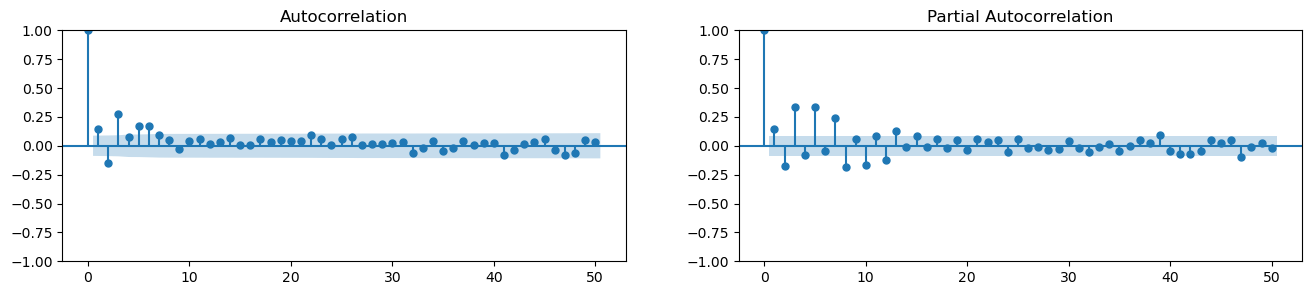

In [20]:
# Graficas
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(MA3_1, lags=50, ax=axes[0])
plot_pacf(MA3_1, lags=50, ax=axes[1])

ACF y PACF del modelo ARMA

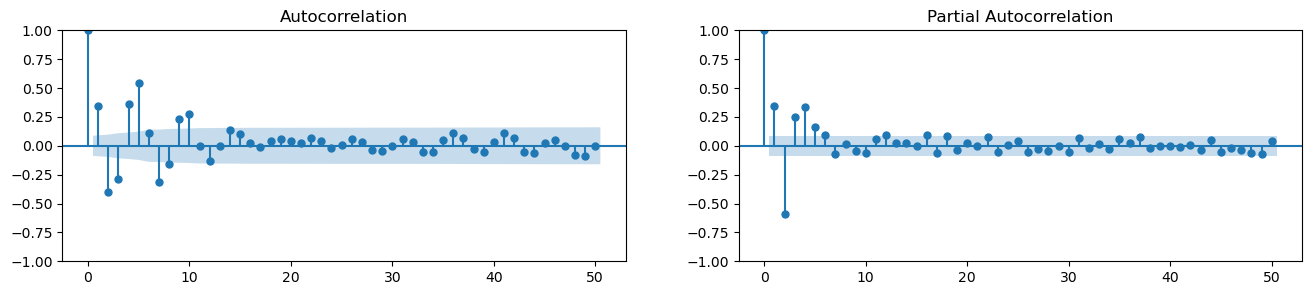

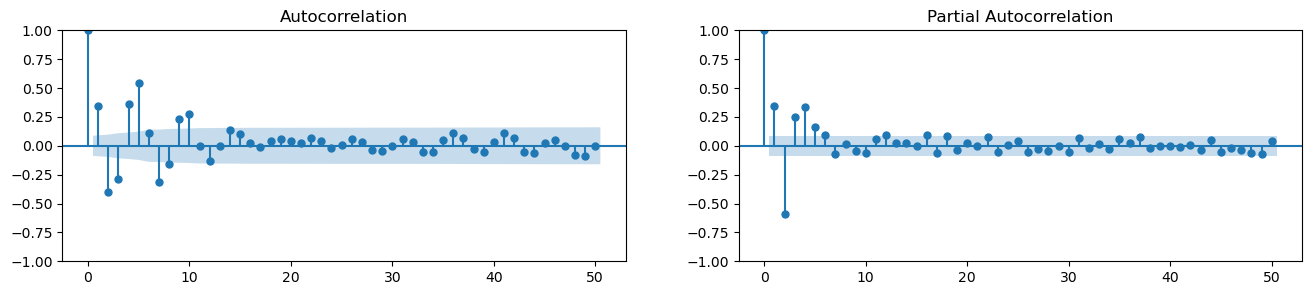

In [25]:
# Graficas
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(ARMA3_1, lags=50, ax=axes[0])
plot_pacf(ARMA3_1, lags=50, ax=axes[1])

# Pruebas de Estacionariedad

In [33]:
adf1 = adfuller(AR3_1)
print(f'p-value: {adf1[1]}')

p-value: 7.30330733898897e-17


In [34]:
adf2 = adfuller(MA3_1)
print(f'p-value: {adf2[1]}')

p-value: 0.0006481626638767664


In [35]:
adf3 = adfuller(ARMA3_1)
print(f'p-value: {adf3[1]}')

p-value: 7.276405744809128e-05


## Estacionariedad de los ejemplos de TS

In [36]:
Data=[df["#Passengers"],df1["Bricks"],df2["Kwh"],df3["Monthly Milk Production per Cow"],df4["Price"],df5["HouseSales"]]
w=0
for k in Data:
    w=w+1
    adf = adfuller(k)
    print("P-value de la serie #"+str(w))
    print(f'p-value: {adf[1]}')

P-value de la serie #1
p-value: 0.991880243437641
P-value de la serie #2
p-value: 0.236826218261678
P-value de la serie #3
p-value: 0.994097902491198
P-value de la serie #4
p-value: 0.6274267086030311
P-value de la serie #5
p-value: 0.16387564674048022
P-value de la serie #6
p-value: 0.03722371625292226


## Simulacion con StatsModels

In [37]:
# Simulate AR(1) process
ar_params = [1, -0.7]  # AR(1) with phi=0.7 
ma_params = [1]  # No MA component
ns=500
ar_process = ArmaProcess(ar_params, ma_params)
ar_data = ar_process.generate_sample(nsample=ns)

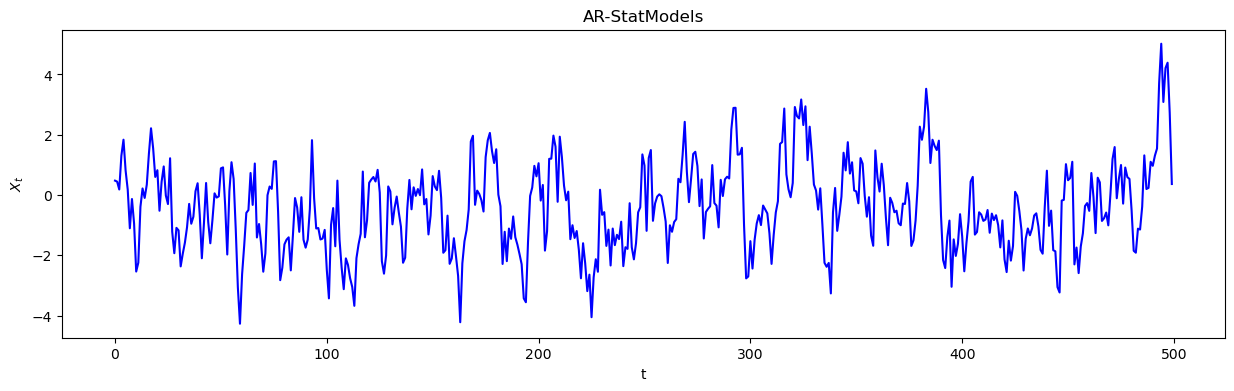

In [39]:
plot_df(ar_data,range(ns),ar_data, title="AR-StatModels", xlabel='t', ylabel='$X_t$', colores="Blue", dpi=100)

In [40]:
# Simulate MA(1) process
ar_params = [1]  # No AR component
ma_params = [1, 0.5]  # MA(1) with theta=0.5
ma_process = ArmaProcess(ar_params, ma_params)
ma_data = ma_process.generate_sample(nsample=ns)

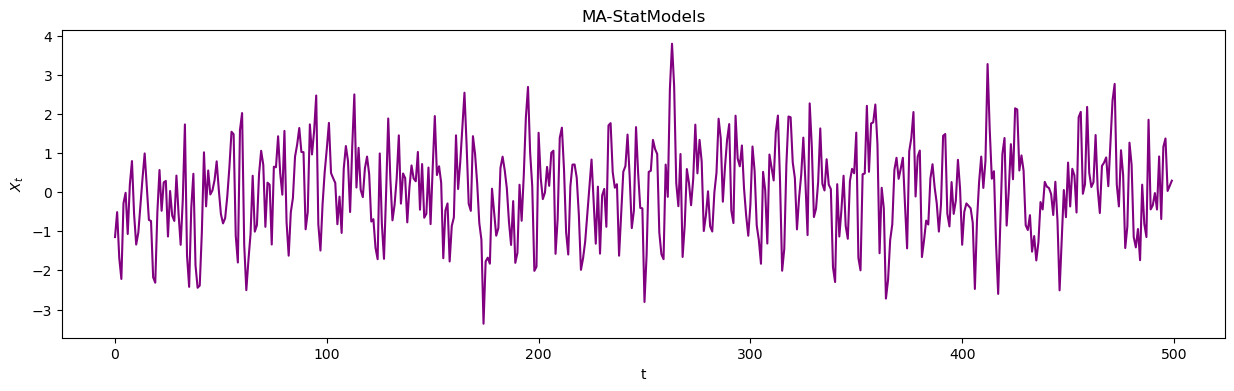

In [42]:
plot_df(ma_data,range(ns),ma_data, title="MA-StatModels", xlabel='t', ylabel='$X_t$', colores="purple", dpi=100)

In [63]:
# Simulate ARIMA(1,1,1) process
ar_params = [1, -0.5]  # AR(1) with phi=0.5
ma_params = [1, 0.4]   # MA(1) with theta=0.4
arima_process = ArmaProcess(ar_params, ma_params)
arima_data = np.cumsum(arima_process.generate_sample(nsample=ns)) 

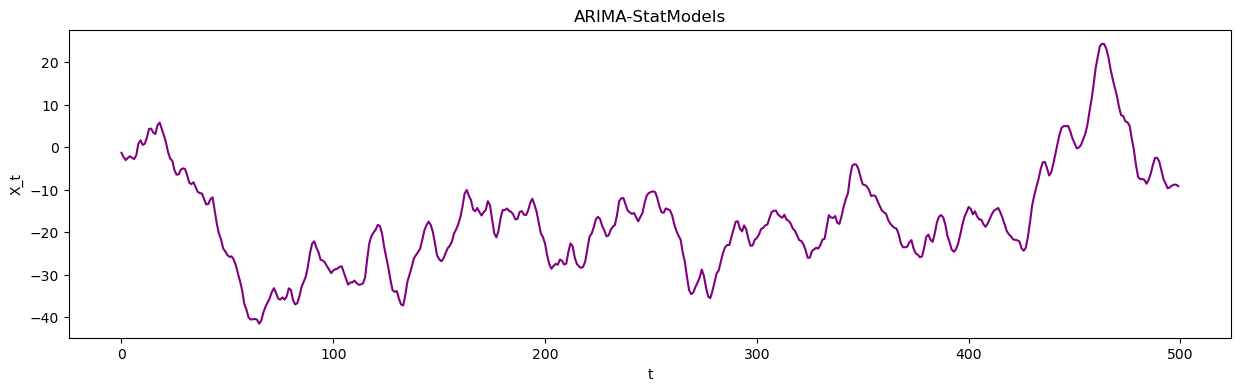

In [64]:
plot_df(arima_data,range(ns),arima_data, title="ARIMA-StatModels", xlabel='t', ylabel='X_t', colores="purple", dpi=100)

# Estimacion de Series de Tiempo, Modelos ARIMA

Estimacion modelo AR

In [66]:
estim1 = ARIMA(AR3_1, order=(2, 0, 0))
res1 = estim1.fit()
print(res1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  502
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -716.516
Date:                Mon, 20 Oct 2025   AIC                           1441.031
Time:                        13:40:32   BIC                           1457.906
Sample:                             0   HQIC                          1447.652
                                - 502                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0335      0.043     -0.778      0.436      -0.118       0.051
ar.L1          0.4455      0.040     11.022      0.000       0.366       0.525
ar.L2         -0.4955      0.039    -12.709      0.0

Estimacion modelo MA

In [67]:
estim2 = ARIMA(MA3_1, order=(0, 0, 2))
res2 = estim2.fit()
print(res2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -729.647
Date:                Mon, 20 Oct 2025   AIC                           1467.294
Time:                        13:44:20   BIC                           1484.153
Sample:                             0   HQIC                          1473.909
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0021      0.057     -0.037      0.970      -0.114       0.110
ma.L1          0.6138      2.038      0.301      0.763      -3.380       4.608
ma.L2         -0.3862      0.789     -0.490      0.6

Estimacion modelo ARMA

In [68]:
estim3 = ARIMA(ARMA3_1, order=(2, 0, 2))
res3 = estim3.fit()
print(res3.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  506
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -751.943
Date:                Mon, 20 Oct 2025   AIC                           1515.886
Time:                        13:44:54   BIC                           1541.245
Sample:                             0   HQIC                          1525.832
                                - 506                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4291      0.055     25.996      0.000       1.321       1.537
ar.L1          0.3532      0.055      6.404      0.000       0.245       0.461
ar.L2         -0.7168      0.037    -19.520      0.0

In [69]:
session_info.show(html=False)

-----
matplotlib          3.10.6
numpy               2.3.3
pandas              2.3.3
seaborn             0.13.2
session_info        v1.0.1
statsmodels         0.14.5
-----
IPython             9.6.0
jupyter_client      8.6.3
jupyter_core        5.8.1
jupyterlab          4.4.9
notebook            7.4.7
-----
Python 3.13.5 | packaged by conda-forge | (main, Jun 16 2025, 08:27:50) [GCC 13.3.0]
Linux-6.8.0-85-generic-x86_64-with-glibc2.39
-----
Session information updated at 2025-10-20 13:48
